<a href="https://colab.research.google.com/github/Mhtag/feature_engineering/blob/main/outliers_and_its_impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Mhtag/feature_engineering/main/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


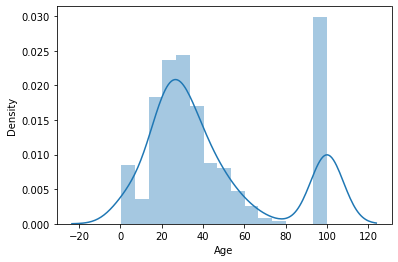

In [6]:
sns.distplot(df['Age'].fillna(100))

## Remove outlier of Gaussian distribution

### Zscore

Text(0, 0.5, 'No of passenger')

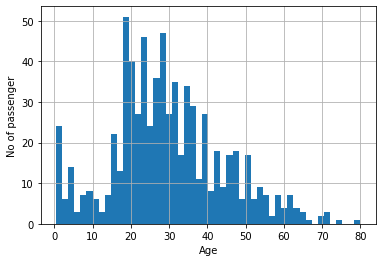

In [7]:
df.Age.hist(bins=50)
plt.xlabel('Age')
plt.ylabel('No of passenger')

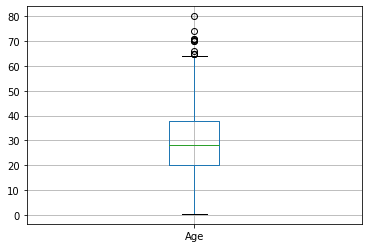

In [9]:
df.boxplot('Age')

In [10]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
upper_limit = df['Age'].mean() + 3*df.Age.std()
lower_limit = df.Age.mean() - 3*df.Age.std()
upper_limit, lower_limit

(73.27860964406095, -13.88037434994331)

### IQR

In [13]:
## Lets compute IQR to calculate the boundaries
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [14]:
lower_threshold = df.Age.quantile(0.25)-(IQR*1.5)
upper_threshold = df.Age.quantile(0.75)+(IQR*1.5)
lower_threshold, upper_threshold

(-6.6875, 64.8125)

## Remove Outlier of Skewed Distribution

Text(0, 0.5, 'Number of Passenger')

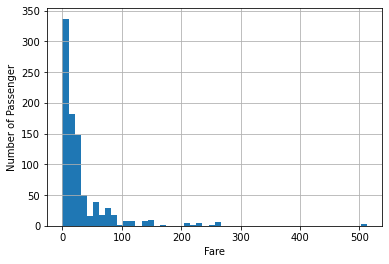

In [15]:
df.Fare.hist(bins=50)
plt.xlabel('Fare')
plt.ylabel('Number of Passenger')

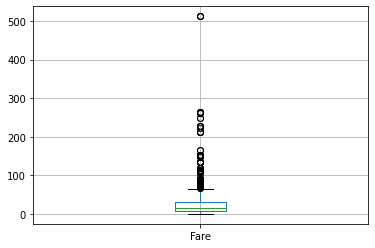

In [16]:
df.boxplot('Fare')

In [17]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [21]:
# Extreme outliers
lower_threshold = df.Fare.quantile(0.25)-(IQR*3)
upper_threshold = df.Fare.quantile(0.75)+(IQR*3)
lower_threshold, upper_threshold

(-61.358399999999996, 100.2688)

In [22]:
data = df.copy()

In [23]:
data.loc[data['Age'] >=73,'Age'] = 73
data.loc[data['Fare'] >= 100, 'Fare'] = 100

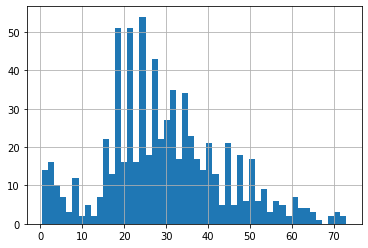

In [24]:
data.Age.hist(bins=50)

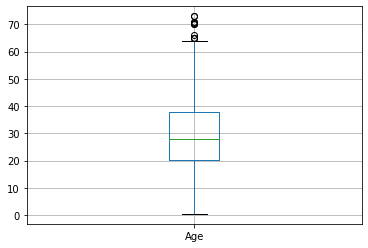

In [25]:
data.boxplot('Age')

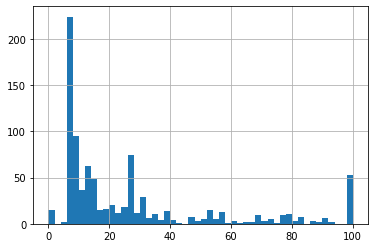

In [26]:
data.Fare.hist(bins=50)

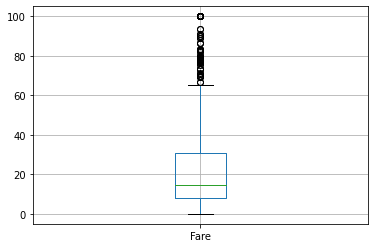

In [27]:
data.boxplot('Fare')

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=0.3, random_state=7)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

print('accuracy_score:', accuracy_score(y_test,y_pred))
print('roc_auc_score: ', roc_auc_score(y_test, y_prob[:,1]))

accuracy_score: 0.6753731343283582
roc_auc_score:  0.714772206959707
